# **Fundamentals of Linear Regression**

This Notebook will cover the fundamentals of Linear Regression. We will cover the following topics:
- [Math Fundamentals](#Math-Fundamentals)
    - [Equation of a Line](#Equation-of-a-Line)
        - [Algebraic Representation](#Algebraic-Representation)
        - [Machine Learning Notation](#Machine-Learning-Notation)
        - [Matrix Representation](#Matrix-Representation)
    - [Cost Function](#Cost-Function)
    - [Gradient Descent](#Gradient-Descent)
        - [Algorithm Steps:](#Algorithm-Steps:)
        - [General Update Rule:](#General-Update-Rule:)
        - [Parameter Update Equation:](#Parameter-Update-Equation:)
        - [Learning Rate ($\alpha$) Considerations:](#Learning-Rate-($\alpha$)-Considerations:)
        - [Variants of Gradient Descent](#Variants-of-Gradient-Descent)
        - [Stopping Criteria for Gradient Descent](#Stopping-Criteria-for-Gradient-Descent)
    - [Assumptions of Linear Regression](#Assumptions-of-Linear-Regression)
        - [1. Linearity](#1.-Linearity)
        - [2. Normality of Residuals](#2.-Normality-of-Residuals)
        - [3. Homoscedasticity](#3.-Homoscedasticity)
- [Implementing Linear Regression in Python](#Implementing-Linear-Regression-in-Python)
    - [Create Lineare Regression on your own](#Create-Lineare-Regression-on-your-own)
        - [Step 1: Create a Linear Dataset](#Step-1:-Create-a-Linear-Dataset)
        - [Step 2: Define Functions for Gradient Calculation](#Step-2:-Define-Functions-for-Gradient-Calculation)
        - [Step 3: Define Functions for Gradient Descent](#Step-3:-Define-Functions-for-Gradient-Descent)
        - [Perform Gradient Descent](#Perform-Gradient-Descent)
            - [2D Plot of the Cost Function](#2D-Plot-of-the-Cost-Function)
            - [3D Plot of the Cost Function](#3D-Plot-of-the-Cost-Function)
            - [3D Plot of the Cost Function with Plotly](#3D-Plot-of-the-Cost-Function-with-Plotly)
        - [Check 2nd and 3rd Assumption](#Check-2nd-and-3rd-Assumption)
    - [Interactive Plot](#Interactive-Plot)
    - [Using Scikit-Learn](#Using-Scikit-Learn)
        - [Load and Explore the Dataset](#Load-and-Explore-the-Dataset)
        - [Feature Seletion](#Feature-Seletion)
        - [Train the Linear Regression Model](#Train-the-Linear-Regression-Model)
        - [2nd and 3rd Assumption](#2nd-and-3rd-Assumption)
        - [Plot the final Line](#Plot-the-final-Line)

## **Math Fundamentals**

### **Equation of a Line**

##### **Algebraic Representation**
In algebraic terms, a straight line is represented as:

$$y = b + mx$$

Where:
- $y$ is the dependent variable (output)
- $x$ is the independent variable (input)
- $m$ is the slope of the line
- $b$ is the y-intercept


<br>

#### **Machine Learning Notation**
In the context of machine learning, we use a slightly different notation:

$$\hat{y} = \theta_0 + \theta_1 x_1$$

Where:
- $\hat{y}$ is the predicted value
- $\theta_0$ (bias term) replaces $b$
- $\theta_1$ is the weight associated with feature $x_1$ (replaces $m$)
- $x_1$ is the input feature


<br>

#### **Matrix Representation**
For multiple features, we generalize this equation using matrix notation:

$$H = X \theta$$

Where:
- $X$ is the **design matrix** containing all feature values (including a column of ones for the bias term)
- $\theta$ is the **parameter vector** $(\theta_0, \theta_1, ..., \theta_n)$
- $H$ is the **vector of predictions**

<br>

---

<br>

### **Cost Function**

A cost function measures the performance of the model by quantifying the error between predicted values and actual values. The objective is to minimize this function to improve model accuracy.

For a dataset with $n$ samples, the cost function for linear regression is typically the **Mean Squared Error (MSE)**:

$$ MSE = J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Where:
- $y_i$ is the actual value for sample $i$
- $\hat{y}_i$ is the predicted value for sample $i$

<br>

#### **Why MSE?**
- Pros:
    - Smooth function, making it easier to compute gradients
    - Quadratic form ensures a single global minimum (convexity)
    - Penalizes larger errors more than smaller ones, reducing variance
- Cons:
    - Sensitive to outliers (since errors are squared). In some cases, alternative loss functions like Mean **Absolute Error (MAE)** is preferred.

<br>

Other common loss functions include:
1. **Mean Error (ME)**:
   $$ME = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)$$
2. **Mean Absolute Error (MAE)**:
   $$MAE = \frac{1}{n}\sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$

<br>

---

<br>

### **Gradient Descent**

Gradient Descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the model parameters.

<br>

#### **Algorithm Steps:**
1. Initialize weights $\theta_j$ with random values.
2. Compute the gradient of the cost function.
3. Update weights using the gradient.
4. Repeat steps 2 and 3 until convergence.

<br>

#### **General Update Rule:**
$$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

Where:
- $\theta_j$ is the weight or bias term
- $\alpha$ is the learning rate (step size)
- $J(\theta)$ is the cost function

<br>

#### **Parameter Update Equations:**
For a single feature $x$ with $\hat{y} = \theta_1 x + \theta_0$:

- **Weight update ($\theta_1$):**
  $$\theta_1 := \theta_1 - \alpha \cdot \bigg(-\frac{2}{n} \sum_{i=1}^{n} x_i \Big(y_i - (\theta_1 x_i + \theta_0)\Big)\bigg)$$

- **Bias update ($\theta_0$):**
  $$\theta_0 := \theta_0 - \alpha \cdot \bigg(-\frac{2}{n} \sum_{i=1}^{n} \Big(y_i - (\theta_1 x_i + \theta_0)\Big)\bigg)$$


<br>

#### **Learning Rate ($\alpha$) Considerations**
- A small $\alpha$ leads to slow convergence.
- A large $\alpha$ may cause overshooting and divergence.
- Adaptive methods like **Adam** or **Momentum-based GD** help optimize learning rates dynamically.

<div style="display: flex; flex-start: center; gap: 30px;">
    <img src="Images/small_learning_rate.svg" width="250"> 
    <img src="Images/optimal_learning_rate.svg" width="250"> 
    <img src="Images/large_learning_rate.svg" width="250"> 
</div>

<br>

#### **Variants of Gradient Descent**
1. **Batch Gradient Descent:**
   - Uses the entire dataset to compute gradients.
   - More stable updates but computationally expensive for large datasets.

2. **Stochastic Gradient Descent (SGD):**
   - Updates parameters using a single random sample at a time.
   - Faster but introduces more noise in updates.

3. **Mini-Batch Gradient Descent:**
   - Compromise between batch and SGD, using small batches of data.
   - Balances efficiency and stability.

<br>

#### **Stopping Criteria for Gradient Descent**
1. Change in cost function $J(\theta)$ falls below a small threshold.
2. Gradients become very small.
3. A predefined number of iterations is reached.

<br>

---

<br>

### **Assumptions of Linear Regression**

For linear regression to produce reliable results, several assumptions need to be met.

<br>

#### **1. Linearity**
The relationship between the dependent variable  and the independent variables  should be linear. This can be checked using a scatter plot of $X$ vs. $Y$.

<div style="display: flex; justify-content: center; gap: 150px;">
    <img src="Images/linearity.svg" width="300"> 
    <img src="Images/non_linearity.svg" width="300"> 
</div>

<br>

#### **2. Normality of Residuals**
Residuals, defined as:
$$\text{residuals} = y_{\text{true}} - y_{\text{pred}}$$
should follow a normal distribution. This assumption ensures that linear regression produces unbiased and efficient estimates. 

A histogram plot of residuals can be used to verify normality:
- **Plot a histogram**: `plt.hist(residuals, bins=30)`

<div style="display: flex; justify-content: center; gap: 150px;">
    <img src="Images/normal_dist.svg" width="300"> 
    <img src="Images/skewed_dist.svg" width="300"> 
</div>

<br>

#### **3. Homoscedasticity**
Homoscedasticity means that the variance of residuals remains constant across all values of the predictor variable $X$. If this condition is violated (heteroscedasticity), the model may assign unequal weights to different observations, leading to biased results.

- **Checking homoscedasticity**:
  - Scatter plot of predicted values vs. residuals: `plt.scatter(y_pred, residuals)`
  - If the points are randomly scattered around zero, homoscedasticity holds.
  - Patterns like a funnel shape indicate heteroscedasticity.

<div style="display: flex; justify-content: center; gap: 150px;">
    <img src="Images/homoscedasticity.svg" width="300"> 
    <img src="Images/heteroscedasticity.svg" width="300"> 
</div>

<br>

## **Implementing Linear Regression in Python**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

### **Create Lineare Regression on your own**

We are creating a simple linear regression model from scratch using the following steps:
1. **Create a linear dataset**
    - Generate random data points using a linear equation.
2. **Define functions to compute gradient for weights and bias**
    - Compute gradients for weights and bias using the partial derivatives of the cost function.
3. **Define functions for gradient descent**
    - Update weights and bias using the gradients.

#### **Step 1: Create a Linear Dataset**

We will create a linear Dataset with the following equation:
$$y = 1.5x + 1 + \text{noise}$$

To avoid, that every data point is exactly on the line, we will add some random noise to the data points. The noise is generated using a normal distribution with a mean of 0 and a standard deviation of 3.

- We have out feature $X$ with 100 data points and a range from 0 to 10.
- The target $y$ is generated using the equation above.

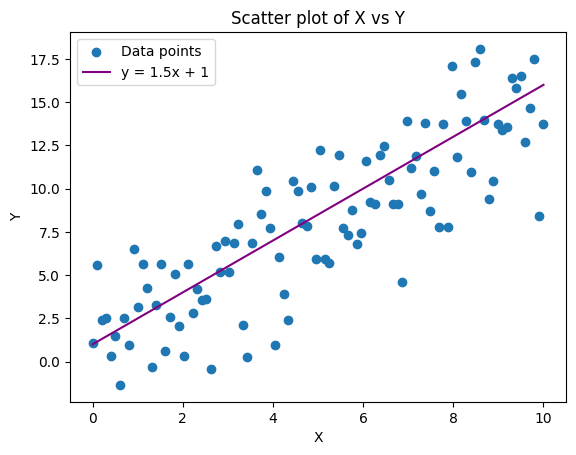

In [3]:
num_points = 100
slope = 1.5
intercept = 1

X = np.linspace(0, 10, num_points)
noise = np.random.normal(loc=0, scale=3, size=num_points)
y = slope * X + intercept + noise


plt.scatter(X, y, label='Data points')
plt.plot(X, slope * X + intercept, color='purple', label=f"y = {slope}x + {intercept}")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.legend()
plt.show()

By plotting the data points, we can already check the **first assumption** of linearity. As we can see we can easy draw a line through the data points. So the assumption of linearity **is met**. 

#### **Step 2: Define Functions for Gradient Calculation**

First of all, we have to create a function to calculate the gradient for our bias (intercept) so we know, how to update our parameter. 

The formula for the gradient of the bias is:
$$-\frac{2}{n} \sum_{i=1}^{n} \Big(y_i - (\theta_1 x_i + \theta_0)\Big)$$

Where:
- $n$ is the number of samples
- $y_i$ is the actual value for sample $i$
- $x_i$ is the input feature for sample $i$
- $\theta_1$ is the weight associated with feature $x_i$ (slope)
- $\theta_0$ is the bias term (intercept)

In [4]:
def get_gradient_at_b(X: np.ndarray, y: np.ndarray, slope: float, intercept: float) -> float:
    """ Calculate the gradient of the loss function with respect to the intercept
    
    Args:
        X (np.ndarray): x values of the data points
        y (np.ndarray): y values of the data points
        slope (float): slope of the line
        intercept (float): intercept of the line
    
    Returns:
        float: gradient of the loss function with respect to the intercept
    """
    N = len(X)
    y_pred = slope * X + intercept
    diff = np.sum(y - y_pred)
    b_gradient = -2/N * diff
    return b_gradient

Second, we can create also a function to calculate the gradient for our weight (slope) so we know, how to update our parameter.

The formula for the gradient of the weight is:
$$-\frac{2}{n} \sum_{i=1}^{n} x_i \Big(y_i - (\theta_1 x_i + \theta_0)\Big)$$

Where:
- $n$ is the number of samples
- $y_i$ is the actual value for sample $i$
- $x_i$ is the input feature for sample $i$
- $\theta_1$ is the weight associated with feature $x_i$ (slope)
- $\theta_0$ is the bias term (intercept)

In [5]:
def get_gradient_at_m(X: np.ndarray, y: np.ndarray, slope: float, intercept: float) -> float:
    """ Calculate the gradient of the loss function with respect to the slope
    
    Args:
        X (np.ndarray): x values of the data points
        y (np.ndarray): y values of the data points
        slope (float): slope of the line
        intercept (float): intercept of the line
    
    Returns:
        float: gradient of the loss function with respect to the intercept
    """
    N = len(X)
    y_pred = slope * X + intercept
    diff = np.sum(X * (y - y_pred))
    m_gradient = -2/N * diff
    return m_gradient

We calculate the gradients for the bias and the weight. We can now simulate a gradient descent step to get an updated value for the bias and the weight.

Formula for updating the parameters:
- **Weight update ($\theta_1$):**
  $$\theta_1 := \theta_1 - \alpha \cdot \text{m\_gradient}$$

- **Bias update ($\theta_0$):**
  $$\theta_0 := \theta_0 - \alpha \cdot \text{b\_gradient}$$

Where:
- $\alpha$ is the learning rate (step size)
- $\text{m\_gradient}$ is the gradient for the weight
- $\text{b\_gradient}$ is the gradient for the bias
- $\theta_1$ is the weight
- $\theta_0$ is the bias

In [6]:
def step_gradient(X: np.ndarray, y: np.ndarray, slope: float, intercept: float, learning_rate: float) -> tuple:
    """ Perform one step of gradient descent
    
    Args:
        X (np.ndarray): x values of the data points
        Y (np.ndarray): y values of the data points
        slope (float): slope of the line
        intercept (float): intercept of the line
        learning_rate (float): learning rate of the algorithm
    
    Returns:
        tuple: updated slope and intercept
    """
    new_slope = slope - learning_rate * get_gradient_at_m(X, y, slope, intercept)
    new_intercept = intercept - learning_rate * get_gradient_at_b(X, y, slope, intercept)
    return new_slope, new_intercept

#### **Step 3: Define Functions for Gradient Descent**

Now we can iterate over the dataset and update the parameters using the gradients. We will repeat this process for a predefined number of iterations.

We have following Hyperparameters to control the training process:
- **Learning Rate ($\alpha$)**: Controls the step size during gradient descent.
- **Number of Iterations**: The number of times the model iterates over the dataset to update parameters.

In [7]:
def gradient_descent(X: np.ndarray, y: np.ndarray, slope: float=0, intercept: float=0, learning_rate: float=0.001, num_iterations: int=10) -> tuple:
    """ Perform gradient descent
    
    Args:
        X (np.ndarray): x values of the data points
        y (np.ndarray): y values of the data points
        slope (float): slope of the line. Default is 0
        intercept (float): intercept of the line. Default is 0
        learning_rate (float): learning rate of the algorithm. Default is 0.001
        num_iterations (int): number of iterations. Default is 10
    
    Returns:
        tuple: final slope and intercept
    """
    for _ in range(num_iterations):
        slope, intercept = step_gradient(X, y, slope, intercept, learning_rate)
    return slope, intercept

#### **Perform Gradient Descent**

We have all our function defined and are now ready to perform the gradient descent to our noisy dataset from the beginning. 

We will use the following hyperparameters:
- **Learning Rate ($\alpha$)**: 0.01
- **Number of Iterations**: 1000

After the training process, we can plot the data points and the line, which was learned by our model.

Cost: 6.824855580655311


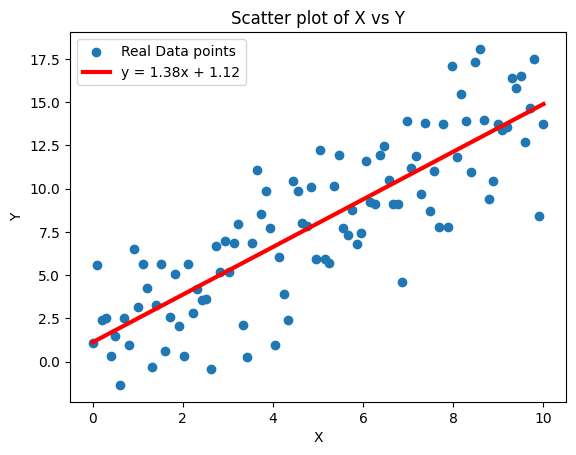

In [8]:
m, b = gradient_descent(X, y, slope, intercept, 0.01, 1000)
print(f"Cost: {metrics.mean_squared_error(y, m * X + b)}")
y_pred = m * X + b

plt.scatter(X, y, label='Real Data points')
plt.plot(X, y_pred, color='red', linewidth=3, label=f"y = {np.round(m, 2)}x + {np.round(b, 2)}")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.legend()
plt.show()

##### **2D Plot of the Cost Function**

Additional we can plot the cost function over a specific parameter $\theta_1$ or $\theta_0$ to see how the cost function behaves.

We plot a 2D contour plot of the cost function to visualize the cost function in a 2D space.

To do this, we have to fix one parameter and calculate the cost function for different values of the other parameter. This plot is a snapshot of the cost function at a specific point in time.

Slope: 1.3772470935565866, Intercept: 1.1184583265758594, Cost: 6.82, Gradient: 0.0


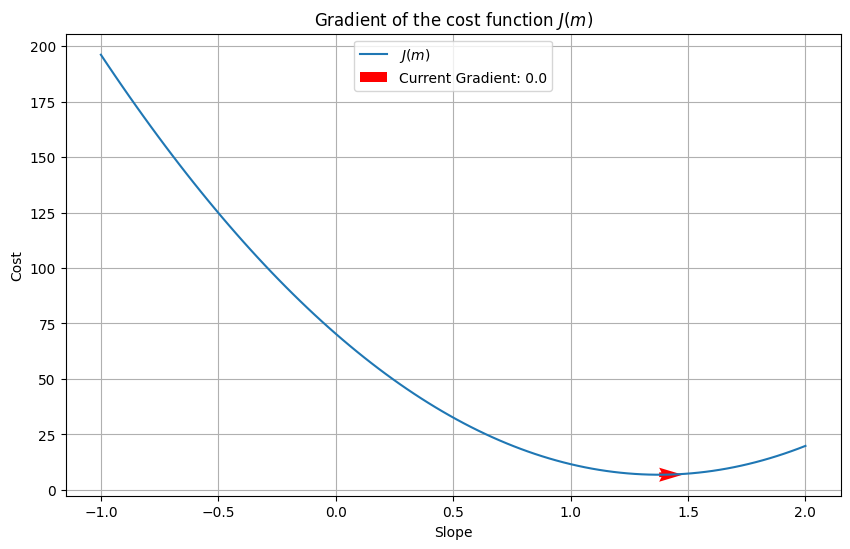

In [9]:
def mse_cost(X: np.ndarray, y: np.ndarray, slope: float, intercept: float) -> float:
    y_pred = slope * X + intercept
    return np.mean((y - y_pred) ** 2)


def plot_gradient_at_m(X: np.ndarray, y: np.ndarray, slope: float, intercept: float, **kwargs) -> plt.gca:
    slope_vals = np.linspace(kwargs.get('min_val', 0), kwargs.get('max_val', 3), 100)
    cost_vals = [mse_cost(X, y, slope_val, intercept) for slope_val in slope_vals]
    
    curr_gradient = get_gradient_at_m(X, y, slope, intercept)
    curr_cost = mse_cost(X, y, slope, intercept)
    
    plt.plot(slope_vals, cost_vals, label="$J(m)$")
    plt.quiver(
        slope, 
        curr_cost, 
        1, 
        curr_gradient, 
        scale=10,
        angles='xy', 
        scale_units='xy', 
        color='red', 
        label=f"Current Gradient: {np.round(curr_gradient, 2)}"
    )
    plt.grid()
    plt.xlabel('Slope')
    plt.ylabel('Cost')
    plt.legend(loc='upper center')
    plt.title('Gradient of the cost function $J(m)$')
    ax = plt.gca()
    return ax


def plot_gradient_at_b(X: np.ndarray, y: np.ndarray, slope: float, intercept: float, **kwargs) -> plt.gca:
    intercept_vals = np.linspace(kwargs.get('min_val', 0), kwargs.get('max_val', 3), 100)
    cost_vals = [mse_cost(X, y, slope, intercept_val) for intercept_val in intercept_vals]
    
    curr_gradient = get_gradient_at_m(X, y, slope, intercept)
    curr_cost = mse_cost(X, y, slope, intercept)
    
    plt.plot(intercept_vals, cost_vals, label="$J(b)$")
    plt.quiver(
        intercept, 
        curr_cost, 
        1, 
        curr_gradient, 
        scale=10,
        angles='xy', 
        scale_units='xy', 
        color='red', 
        label=f"Current Gradient: {np.round(curr_gradient, 2)}"
    )
    plt.grid()
    plt.xlabel('Intercept')
    plt.ylabel('Cost')
    plt.legend(loc='upper center')
    plt.title('Gradient of the cost function $J(b)$')
    ax = plt.gca()
    return ax


def plot_gradient(X: np.ndarray, y: np.ndarray, slope: float, intercept: float, param: str="m", **kwargs):
    if param == "m":
        ax = plot_gradient_at_m(X, y, slope, intercept, **kwargs)
    elif param == "b":
        ax = plot_gradient_at_b(X, y, slope, intercept, **kwargs)
    else:
        raise ValueError("param should be either 'm' or 'b'")
    print(f"Slope: {slope}, Intercept: {intercept}, Cost: {np.round(mse_cost(X, y, slope, intercept), 2)}, Gradient: {np.round(get_gradient_at_m(X, y, slope, intercept), 2)}")
    return ax


plt.figure(figsize=(10, 6))
plot_gradient(X, y, m, b, param="m", min_val=-1, max_val=2)
plt.show()

##### **3D Plot of the Cost Function**

Lowest cost: 6.826422366328165
Optimal slope: [1.36363636]
Optimal intercept: [1.18181818]


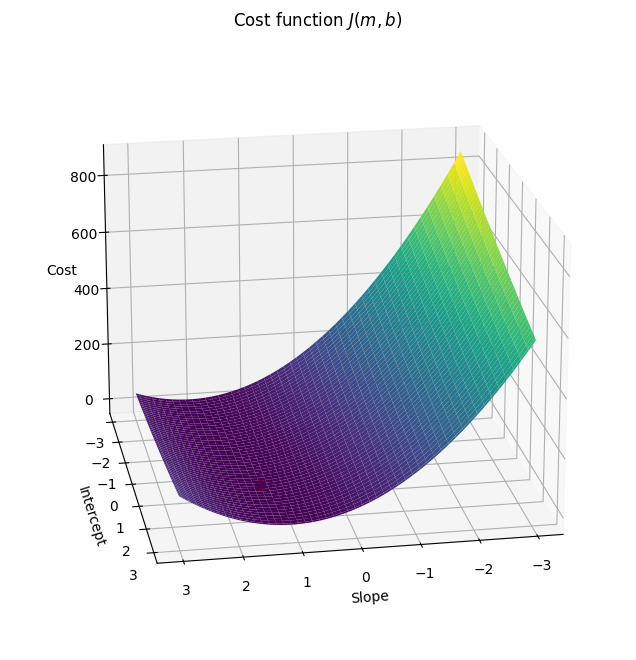

In [10]:
from mpl_toolkits.mplot3d import Axes3D


m_vals = np.linspace(-3, 3, 100)
b_vals = np.linspace(-3, 3, 100)
M_vals, B_vals = np.meshgrid(m_vals, b_vals)

costs = np.array([[mse_cost(X, y, m, b) for m, b in zip(m_row, b_row)] for m_row, b_row in zip(M_vals, B_vals)])
lowest_cost = np.min(costs)
idx_lowest_cost = np.where(costs == lowest_cost)
m_lowest_cost = M_vals[idx_lowest_cost]
b_lowest_cost = B_vals[idx_lowest_cost]
print(f"Lowest cost: {lowest_cost}")
print(f"Optimal slope: {m_lowest_cost}")
print(f"Optimal intercept: {b_lowest_cost}")

assert M_vals.shape == B_vals.shape == costs.shape

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M_vals, B_vals, costs, cmap='viridis')
ax.scatter(m_lowest_cost, b_lowest_cost, lowest_cost, color='red', s=50, label='Optimal values', marker='o', alpha=1)
ax.view_init(20, 80)
ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')
ax.set_zlabel('Cost')
ax.set_title('Cost function $J(m, b)$')
plt.show()

##### **3D Plot of the Cost Function with Plotly**

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        z=costs,
        x=M_vals,
        y=B_vals,
        colorscale='Viridis',
        opacity=0.7,
        name='Cost function J(m, b)'
    ),
    go.Scatter3d(
        x=m_lowest_cost,
        y=b_lowest_cost,
        z=[lowest_cost],
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=1
        ),
        name='Optimal values'
    )
])
fig.update_layout(
    title='Cost function J(m, b)',
    scene=dict(
        xaxis_title='Slope',
        yaxis_title='Intercept',
        zaxis_title='Cost'
    ),
    showlegend=True
)
fig.show()

#### **Check 2nd and 3rd Assumption**

We already checked 1st Assumption as we plotted the data points and the line (Watch [here](#step-1-create-a-linear-dataset)). Now we will check the 2nd and 3rd Assumption.

##### **Check Normality of Residuals**

First we have to check the normality of the residuals. We can do this by plotting a histogram of the residuals. If the histogram is bell-shaped, the residuals are normally distributed.
$$\text{residuals} = y_{\text{true}} - y_{\text{pred}}$$

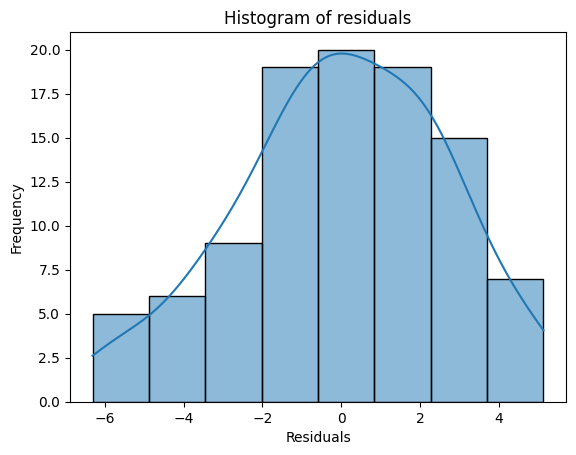

In [12]:
residuals = y - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

As we can see in the histogram, the residuals are normally distributed. So the **2nd Assumption is met**.

##### **Check Homoscedasticity**

Now we can also check the homoscedasticity of the residuals. We can do this by plotting the residuals against the predicted values. If the points are randomly scattered around zero, homoscedasticity holds.

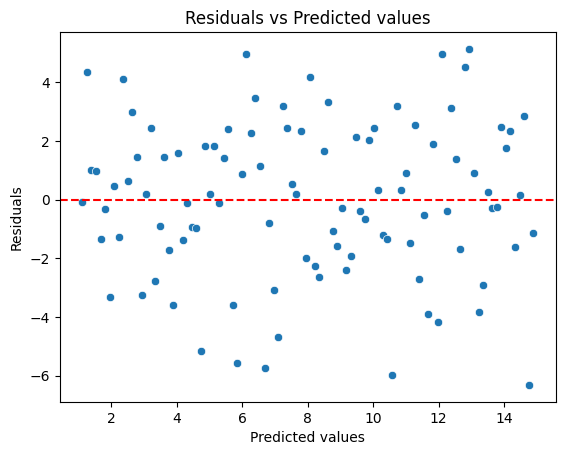

In [13]:
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

We can see that the residuals are normally distributed and centered around 0. This is a good sign that our model is performing well. We can see now pattern like a funnel shape, which would indicate heteroscedasticity. So the **3rd Assumption is met**.

### **Interactive Plot**

In [ ]:
from ipywidgets import *

In [ ]:
output_plot = Output()
output_text = Output()


m_slider = FloatSlider(value=1, min=-10, max=10, step=0.1, continuous_update=False, orientation='horizontal', readout_format='.1f', layout={'width': '400px'}, description='Slope')
b_slider = FloatSlider(value=1, min=-15, max=15, step=0.1, continuous_update=False, orientation='horizontal', readout_format='.1f', layout={'width': '400px'}, description='Intercept')
plot_best_fit_checkbox = Checkbox(value=False, description='Plot Best-Fit', disabled=False)
n_points = BoundedIntText(value=10, min=3, max=100, step=1, disabled=False, description='# Points')
randomize_points_button = Button(description='Randomize Points', button_style='info', tooltip='Randomize points', icon='refresh')


X = None
y = None


def create_random_points(change=None):
    global X, y
    num_points = n_points.value
    m = np.random.uniform(-1, 1)
    b = np.random.uniform(-1, 1)
    X = np.random.uniform(-8, 8, num_points)
    scale = np.random.uniform(2, 5)
    noise = np.random.normal(loc=0, scale=scale, size=num_points)
    y = m * X + b + noise
    plot_best_fit_checkbox.value = False
    update()


def get_best_line_params():
    global X, y
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    m = model.coef_[0]
    b = model.intercept_
    m_slider.value = m
    b_slider.value = b
    return m, b


def create_plot(m, b):
    X_pred = np.linspace(-10, 10, 100)
    y_pred = m * X_pred + b
    
    sns.scatterplot(x=X, y=y)
    plt.plot(X_pred, y_pred, color='red', label=f"y = {np.round(m, 2)}x + {np.round(b, 2)}")
    plt.vlines(x=0, ymin=-10, ymax=10, color='black', linewidth=0.5)
    plt.hlines(y=0, xmin=-10, xmax=10, color='black', linewidth=0.5)
    plt.xlim(-10, 10) 
    plt.ylim(-10, 10)  
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Scatter plot of X vs y')
    ax = plt.gca()
    ax.set_xticks(np.arange(-10, 12, 2))
    ax.set_yticks(np.arange(-10, 12, 2))
    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)


def update(change=None):
    with output_plot:
        output_plot.clear_output(wait=True)
        m, b = m_slider.value, b_slider.value
        if plot_best_fit_checkbox.value:
            m, b = get_best_line_params()
        create_plot(m, b)
        plt.show()
    
    with output_text:
        output_text.clear_output()
        curr_eq = f"y = {np.round(m_slider.value, 2)}x + ({np.round(b_slider.value, 2)})"
        total_squared_error = np.sum((y - (m * X + b)) ** 2)
        display(HTML(value=f"""
                    <div style='display: flex; flex-direction: row; align-items: center; gap: 50px;'>
                        <span style='font-size: 16px;'>{curr_eq}</span>
                        <span style='font-size: 16px;'>Total Squared Error: {np.round(total_squared_error, 2)}</span>
                    </div>
                    """))


top_box  = HBox([
    output_plot
])

bottom_box = VBox([
        HBox([m_slider, b_slider]),
        HBox([plot_best_fit_checkbox, output_text]),
        HBox([n_points, randomize_points_button])
])


for widget in [m_slider, b_slider, plot_best_fit_checkbox]:
    widget.observe(update, names='value')

for widget in [randomize_points_button]:
    widget.on_click(create_random_points)


ui = VBox([top_box, bottom_box])
display(ui)
create_random_points()

### **Using `Scikit-learn`**

We built our own Linear Regression model from scratch. It's a lot of work to built it from scratch, luckily we can use the `LinearRegression` class from `Scikit-learn` to build a Linear Regression model.

We will use this class in combination with the `california_housing` dataset from `Scikit-learn` to build a Linear Regression model.

#### **Load and Explore the Dataset**

In [14]:
dataset = fetch_california_housing()
X_data = dataset.data
df_X = pd.DataFrame(X_data, columns=dataset.feature_names)
y_data = dataset.target
df_y = pd.Series(y_data, name=dataset.target_names[0])

df = pd.concat([df_X, df_y], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We following features and target in the dataset:
- **Features**:
    - `MedInc`: Median Income
    - `HouseAge`: Median House Age
    - `AveRooms`: Average Rooms
    - `AveBedrms`: Average Bedrooms
    - `Population`: Population
    - `AveOccup`: Average Occupancy
    - `Latitude`: Latitude
    - `Longitude`: Longitude
- **Target**:
    - `MedHouseVal`: Median House Value

Because we want to use a simple Linear Regression model with only one feature, we will use the `MedInc` feature to predict the `MedHouseVal`.

Let's plot a scatter plot to check the linearity of the data points.

#### **Feature Selection**

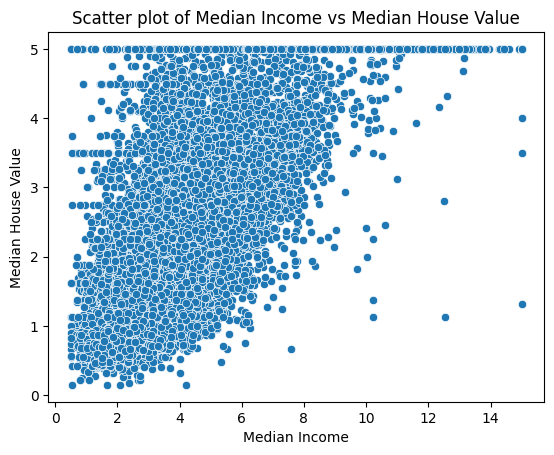

In [25]:
X = df.MedInc.values
y = df.MedHouseVal.values

sns.scatterplot(x=X, y=y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter plot of Median Income vs Median House Value')
plt.show()

We can see a slightly linear relationship between the `MedInc` and the `MedHouseVal`. So the **1st Assumption is met**.

We can also check in other ways the linear relationship between the features and the target. We can use the `pairplot` function from `Seaborn` to plot the relationship between the features and the target or we can use the `heatmap` function to plot the correlation between the features and the target.

Let's start by plotting the correlation between the features and the target with the `heatmap` function.

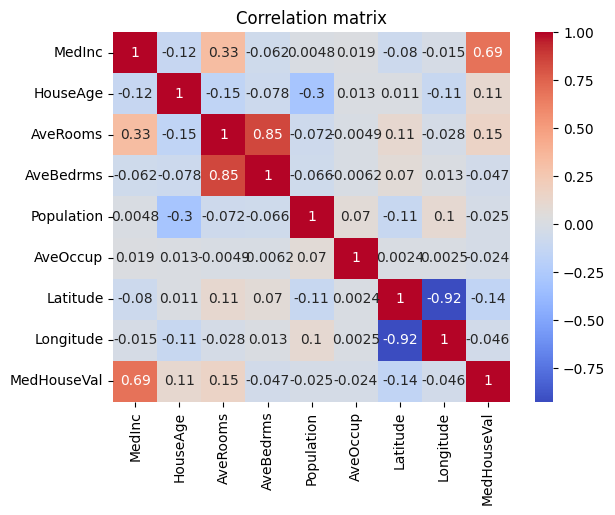

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

As we can see `MedInc` is the feature with the highest correlation to the target `MedHouseVal`. So we will use this feature to build our Linear Regression model. All other features have a correlation around 0 to the target. 

The `heatmap` function tells us the correlation in numbers between the features and the target. We can plot a more visual representation of the correlation with the `pairplot` function from `Seaborn`.

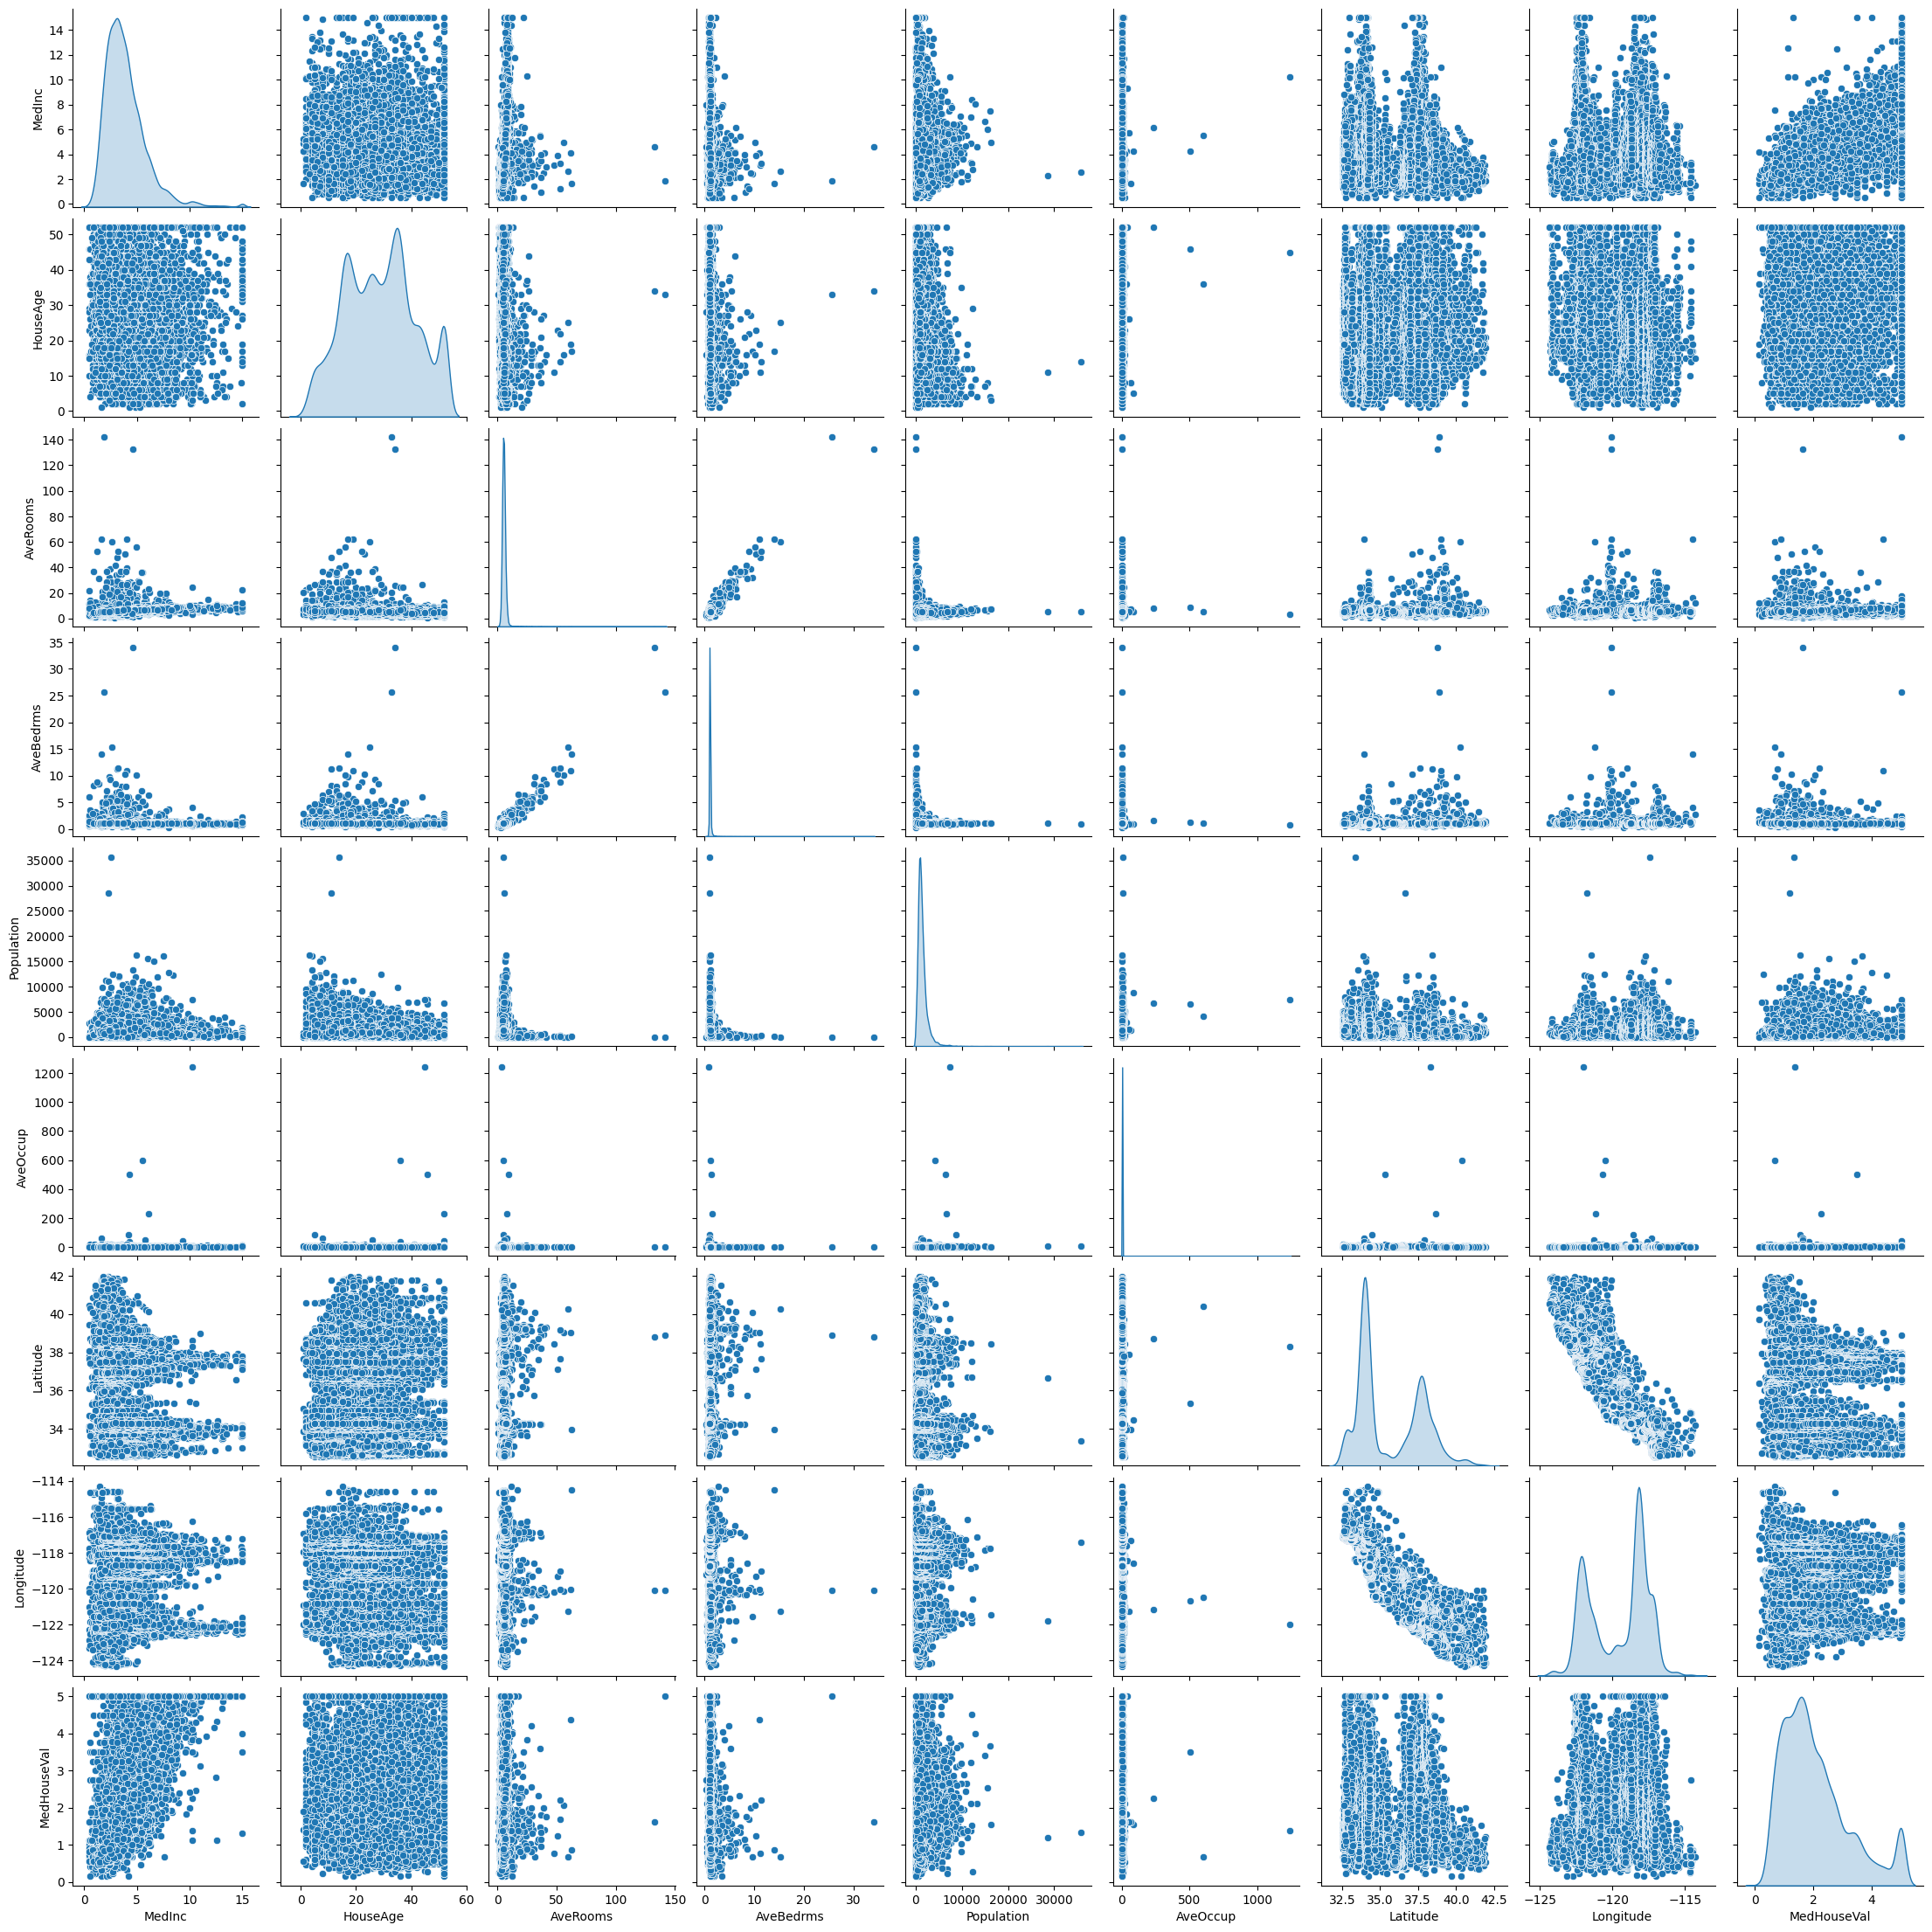

In [17]:
sns.pairplot(df, diag_kind='kde')
plt.show()

Our assumption that `MedInc` has a linear relationship with the target `MedHouseVal` is confirmed by the `pairplot`. We can see a linear relationship between the `MedInc` and the `MedHouseVal`. It's the same plot as we plotted in the beginning.

#### **Train the Linear Regression Model**

To train our model, we split our dataset into a training and a test set. We will use 70% of the data for training and 30% for testing.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 1), (6192, 1), (14448, 1), (6192, 1))

Now we can create our model and train it with the training data.

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We can plot the coefficient of determination ($R^2$) to evaluate the model. The coefficient of determination is a measure of how well the model predicts the target values. It ranges from 0 to 1, where 1 indicates a perfect fit.

In [20]:
model.score(X_train, y_train)

0.47365918084812353

We have a score of 0.47, which is not very good. We can see that the model is not very accurate in predicting the target values.

If we remember the scatterplot between `MedInc` and `MedHouseVal`, we can see that the data points are not perfectly linear. This could be the reason why our model is not very accurate.

Let's print the learned parameters $\theta_0$ and $\theta_1$. We can use the `intercept_` and `coef_` attributes of the model to get the learned parameters.

In [21]:
model.coef_, model.intercept_

(array([[0.41819327]]), array([0.44794966]))

#### **2nd and 3rd Assumption**

After the training we can check now the 2nd and 3rd Assumption.

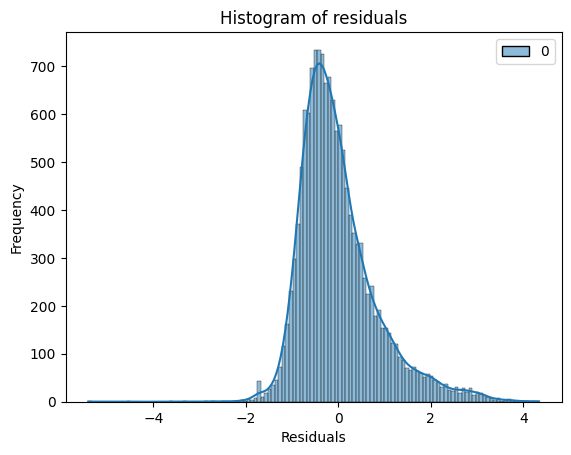

In [22]:
# 2nd Assumption: Normality of residuals

y_pred = model.predict(X_train)
residuals = y_train - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

Now let's check the homoscedasticity of the residuals. We can do this by plotting the residuals against the predicted values. If the points are randomly scattered around zero, homoscedasticity holds.

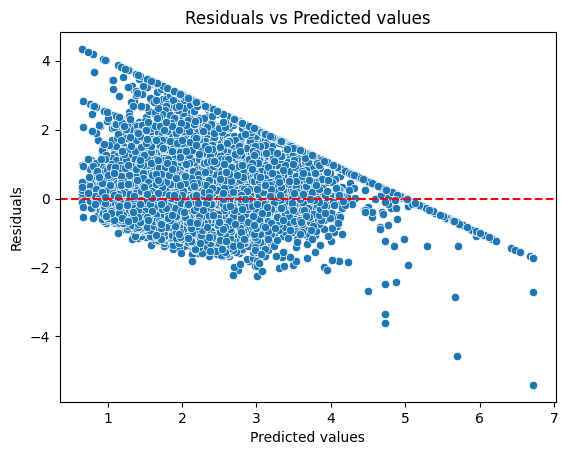

In [23]:
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten())
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

It's not perfect centered around 0, we can see a slight pattern. This confirms the model score of 0.47. The model is not very accurate in predicting the target values.

#### **Plot the final Line**

We have our trained model, our parameters, and our data points. We can now plot the data points and the line, which was learned by our model.

Cost: 0.7011350707793856


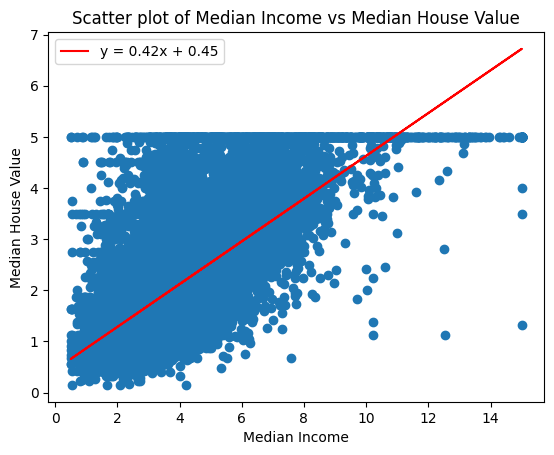

In [24]:
plt.scatter(X, y)
y_pred = model.predict(X.reshape(-1, 1))
print(f"Cost: {metrics.mean_squared_error(y, y_pred)}")
plt.plot(X, y_pred, color='red', label=f"y = {np.round(model.coef_[0][0], 2)}x + {np.round(model.intercept_[0], 2)}")
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter plot of Median Income vs Median House Value')
plt.legend()
plt.show()